# Data Mining for Retail Stores
> - ***<u>Ονοματεπώνυμο</u> : Κωνσταντίνος - Ηλίας Χονδρορρίζος***
> - ***<u>Α.Ε.Μ.</u> : 3812***

In [1]:
# Importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates

np.random.seed(4) 
pd.set_option('display.max_columns', None)
sns.set_theme(style="whitegrid", palette="dark:#5A9_r")

### Raw data manipulation:
 1. Starting off this project, lets start by loading the data from the csv file.
 2. After that, I am going to drop the requested items,
 3. one hot encoding to the items,
 4. perform differentiation of the basket_value attribute,
 5. and visualize the data using various techniques.

In [2]:
transactions_init = pd.read_csv("GroceriesInitial.csv")
print(f"Total rows: {len(transactions_init)}")
transactions_init.head()

Total rows: 7536


,id,basket_value,recency_days,Item_1,Item_2,Item_3,Item_4,Item_5,Item_6,Item_7,Item_8,Item_9,Item_10,Item_11,Item_12,Item_13,Item_14,Item_15,Item_16,Item_17,Item_18,Item_19,Item_20,Item_21,Item_22,Item_23,Item_24,Item_25,Item_26,Item_27,Item_28,Item_29,Item_30,Item_31,Item_32
0,1,1.1,2,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3.6,31,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.2,7,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6.6,7,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.5,66,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


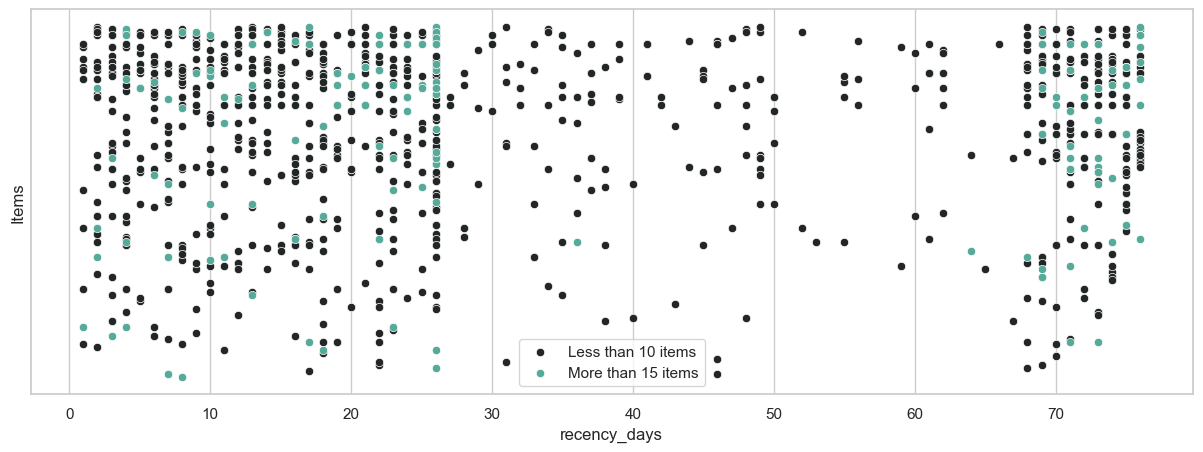

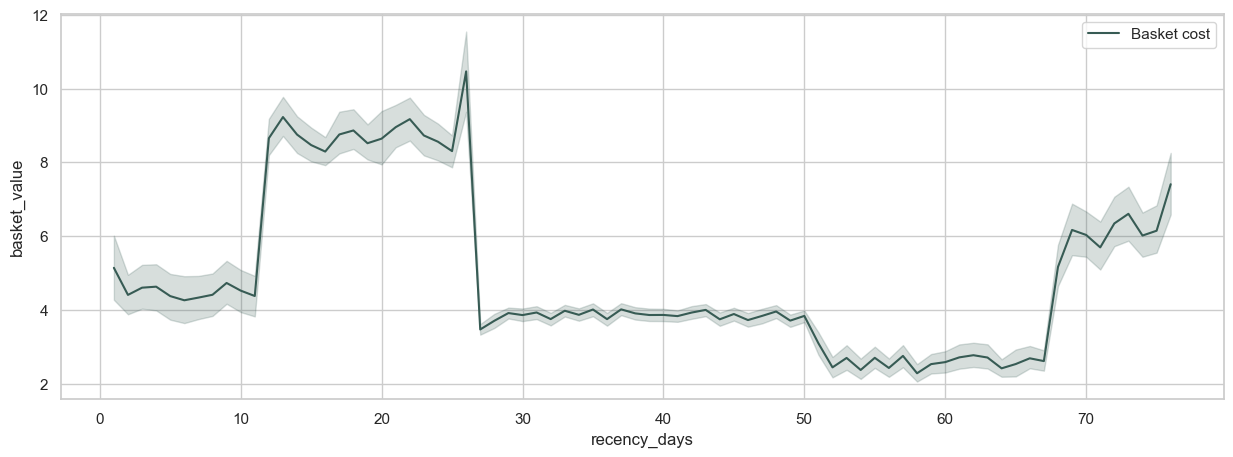

In [3]:
fig, axes = plt.subplots(figsize=(15,5))

sns.scatterplot(ax = axes, data = transactions_init, x = "recency_days", y = "Item_10", color="#232626")
sns.scatterplot(ax = axes, data = transactions_init, x = "recency_days", y = "Item_16", color="#55aa99")
plt.legend(["Less than 10 items","More than 15 items"])
plt.yticks([])
plt.ylabel("Items")

fig = plt.figure(figsize=(15,5))
sns.lineplot(data = transactions_init, x = "recency_days", y = "basket_value", color = "#375b54")
plt.legend(["Basket cost"])
plt.show()

In [4]:
def isNaN(num):
    return num == num

for index,i in enumerate(transactions_init["Item_32"]):
    if isNaN(i):
        print(f"Transaction with the most items:\n{transactions_init.iloc[index,1:].to_frame().T}")
    

Transaction with the most items:
    basket_value recency_days       Item_1   Item_2      Item_3 Item_4  \
947         21.0           26  frankfurter  sausage  liver loaf    ham   

      Item_5 Item_6        Item_7          Item_8           Item_9  \
947  chicken   beef  citrus fruit  tropical fruit  root vegetables   

              Item_10     Item_11 Item_12 Item_13 Item_14             Item_15  \
947  other vegetables  whole milk  butter    curd  yogurt  whipped/sour cream   

       Item_16      Item_17      Item_18        Item_19     Item_20  \
947  beverages  soft cheese  hard cheese  cream cheese   mayonnaise   

           Item_21     Item_22         Item_23 Item_24 Item_25    Item_26  \
947  domestic eggs  rolls/buns  roll products    flour   pasta  margarine   

           Item_27 Item_28 Item_29    Item_30           Item_31  Item_32  
947  specialty fat   sugar   soups  skin care  hygiene articles  candles  


In [5]:
PRODUCTS = ["citrus fruit", "tropical fruit", "whole milk", "other vegetables", "rolls/buns", "chocolate", 
            "bottled water", "yogurt", "sausage", "root vegetables", "pastry", "soda", "cream"]
def keep_products(product):
    if product in PRODUCTS:
        return product
    
    return float("nan")

info_cols = transactions_init.iloc[:,:3]
item_cols = transactions_init.iloc[:, 3:].applymap(lambda x :keep_products(x))

In [6]:
ids = []

one_hot_items = np.empty([0,13], dtype = np.int8)

for index,row in item_cols.iterrows():
    if row.isnull().sum() == 32:
        ids.append(index)
    else:
        transact = np.zeros(shape=(1, 13) ,dtype = np.int8)
        for i in row.dropna().tolist():
            transact[0,PRODUCTS.index(i)] = 1
        one_hot_items = np.vstack((one_hot_items, transact))
        
items = pd.DataFrame(one_hot_items, columns=PRODUCTS)        

In [7]:
transactions = pd.concat([info_cols.drop(ids).reset_index(drop=True), items], axis=1)
transactions.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
0,1,1.1,2,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3.6,31,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,1.2,7,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,6.6,7,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,2.5,66,0,0,1,1,0,0,0,0,0,0,0,0,0


In [8]:
transactions.iloc[:,1:].describe(percentiles=[.33,.66])

,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream
count,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000,7227.000000
mean,5.057465,37.349661,0.112633,0.142798,0.347724,0.263318,0.250311,0.067525,0.150408,0.189844,0.127854,0.148333,0.121074,0.237305,0.001799
std,3.762228,25.329775,0.316166,0.349891,0.476281,0.440464,0.433222,0.250946,0.357496,0.392204,0.333950,0.355454,0.326236,0.425460,0.042377
min,1.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
33%,2.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.100000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
66%,6.000000,54.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.100000,76.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


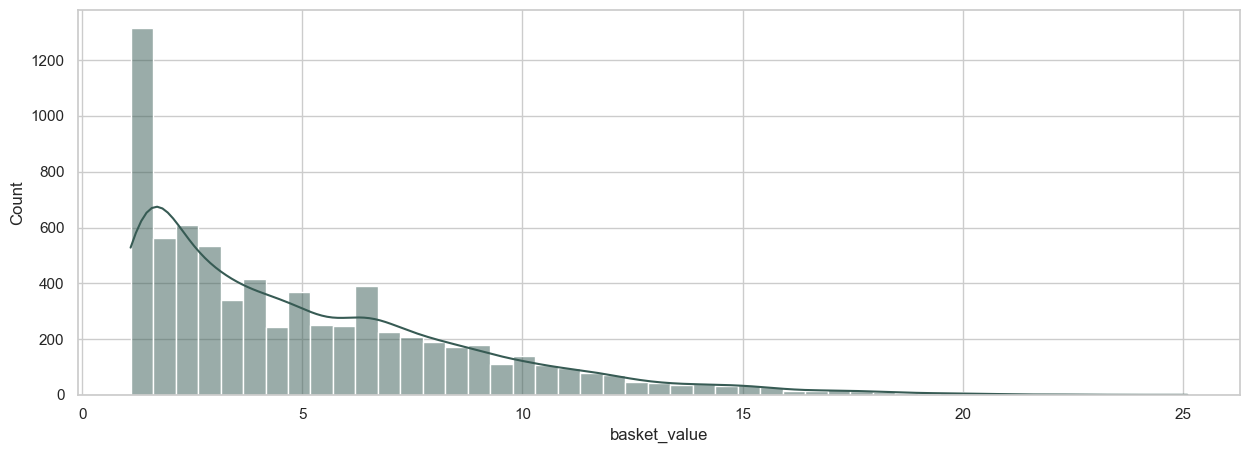

In [9]:
fig = plt.figure(figsize=(15,5))
sns.histplot(transactions["basket_value"], kde=True, color = "#375b54")

plt.show()

In [10]:
print(f"First bucket :  {len(transactions.loc[transactions['basket_value'] < 2.5])}")
print(f"Second bucket: {len(transactions.loc[(transactions['basket_value'] < 6) & (transactions['basket_value'] >= 2.5)])}")
print(f"Third bucket :  {len(transactions.loc[transactions['basket_value'] >= 6])}")

First bucket :  2312
Second bucket: 2434
Third bucket :  2481


In [11]:
transactions.loc[transactions['basket_value'] < 2.9, 'value_slot'] = "Low"
transactions.loc[(transactions['basket_value'] < 6.3) & (transactions['basket_value'] >= 2.9), 'value_slot'] = "Medium"
transactions.loc[transactions['basket_value'] >= 6.3, 'value_slot'] = "High"

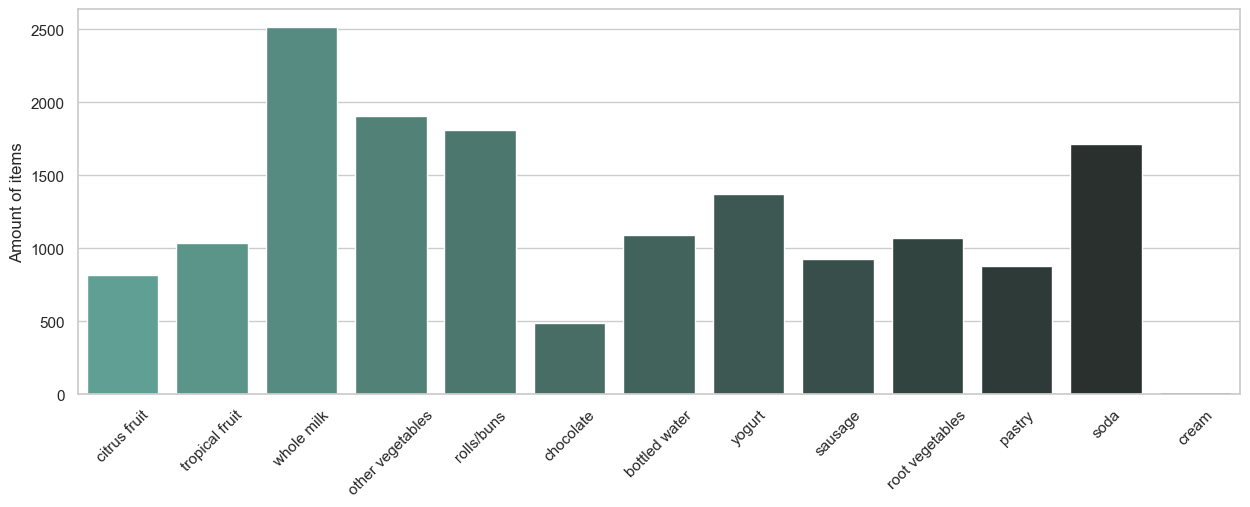

In [12]:
dictionary = {}
for i in PRODUCTS:
    dictionary[i] = transactions[i].sum()
    
fig = plt.figure(figsize=(15,5))
sns.barplot(x = list(dictionary.keys()), y = list(dictionary.values()), palette="dark:#5A9_r")
plt.xticks(rotation=45)
plt.ylabel("Amount of items")
plt.show()

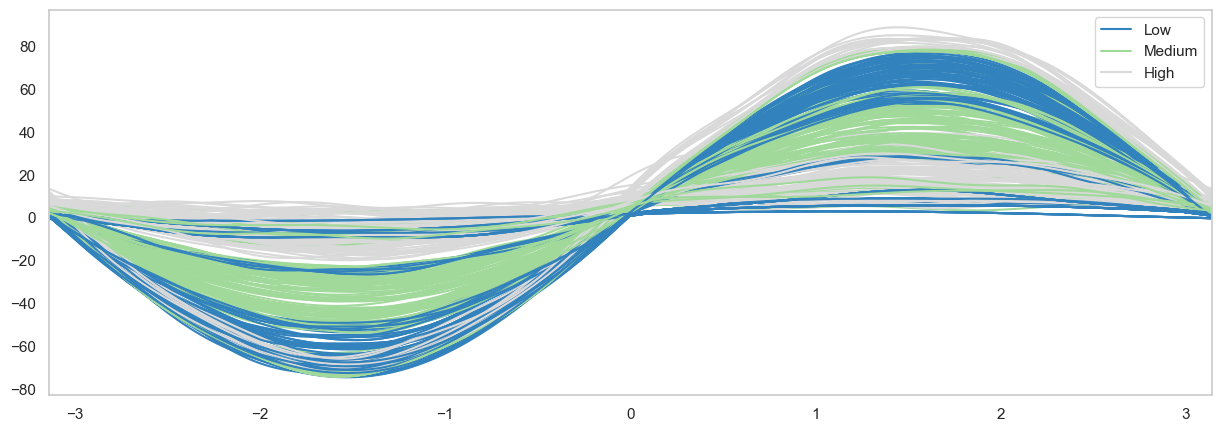

In [13]:
fig = plt.figure(figsize=(15,5))
pd.plotting.andrews_curves(transactions.iloc[:300,1:], 'value_slot' ,colormap="tab20c")
plt.show()

In [14]:
transactions[['recency_days']] = preprocessing.MinMaxScaler().fit_transform(transactions[['recency_days']])
transactions[['basket_value']] = preprocessing.MinMaxScaler().fit_transform(transactions[['basket_value']])

### Assosiation rules with A-priori algorithm:
 1. Run the algorith for multiple minimum support value.
 2. Find the top 20 rules based on itemset confidence.
 3. Find the top 20 rules based on itemset and basket value confidence.
 4. Interpretation and draw conclusions about the rules.

### <u>First Subquestion</u>

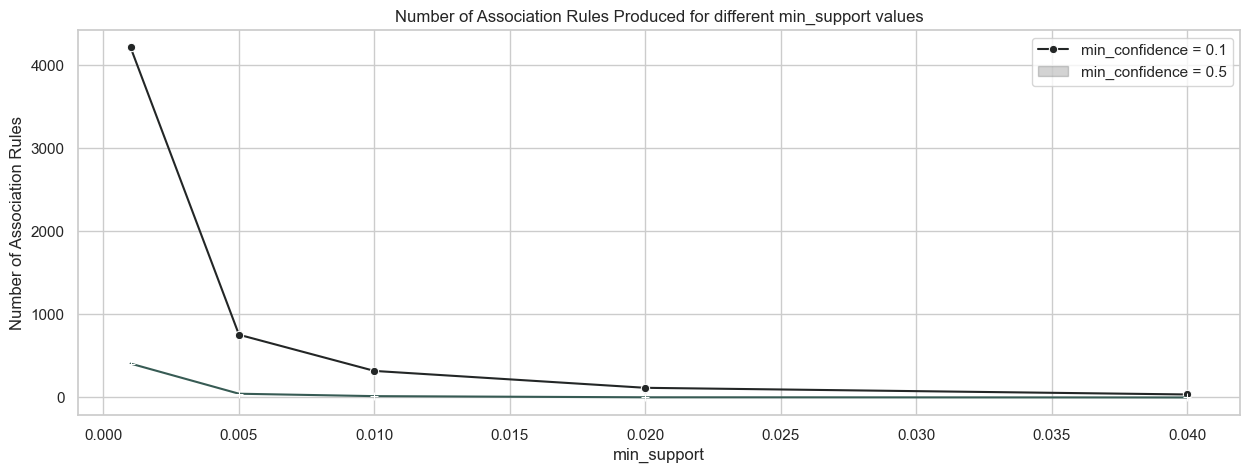

In [15]:
support = [.001, .005, .01, .02, .04]
number_of_rules1 = []
number_of_rules2 = []
for sup in support:
    number_of_rules1.append(len(association_rules(apriori(transactions.iloc[:,3:-1].astype(bool), min_support=sup, use_colnames=True), 
                                metric="confidence", min_threshold=0.1)))
    number_of_rules2.append(len(association_rules(apriori(transactions.iloc[:,3:-1].astype(bool), min_support=sup, use_colnames=True), 
                                metric="confidence", min_threshold=0.5)))

fig = plt.figure(figsize=(15,5))
sns.lineplot(x=support, y=number_of_rules1, marker='o',color="#232626")
sns.lineplot(x=support, y=number_of_rules2, marker='+',color="#375b54")
plt.legend(["min_confidence = 0.1", "min_confidence = 0.5"])
plt.title("Number of Association Rules Produced for different min_support values")
plt.xlabel("min_support")
plt.ylabel("Number of Association Rules")
plt.show()

### <u>Second Subquestion</u>


In [16]:
def extract_rules(results):
    
    lhs        = list(results.iloc[:,0])
    rhs        = list(results.iloc[:,1])

    support    = list(results.iloc[:,4])

    confidence = list(results.iloc[:,5])
    lift       = list(results.iloc[:,6])


    return list(zip(lhs, rhs, support, confidence, lift))  

In [17]:
# Run Apriori algorithm with min_support=0.03 and min_confidence=0.2 and print the results
items = apriori(transactions.iloc[:,3:-1].astype(bool), min_support=.03, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.2)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

Total number of association rules : 44


In [18]:
df_rules.iloc[:,0:-1].sort_values(by=['Confidence'], ascending=False).head(20).T

,39,42,40,15,25,2,13,38,8,16,0,1,3,29,14,22,11,41,10,37
Left_Hand_Side,"(other vegetables, yogurt)","(other vegetables, root vegetables)","(whole milk, root vegetables)",(root vegetables),(root vegetables),(tropical fruit),(yogurt),"(whole milk, yogurt)",(other vegetables),(pastry),(citrus fruit),(citrus fruit),(tropical fruit),(sausage),(sausage),(yogurt),(bottled water),"(whole milk, other vegetables)",(rolls/buns),"(whole milk, other vegetables)"
Right_Hand_Side,(whole milk),(whole milk),(other vegetables),(whole milk),(other vegetables),(whole milk),(whole milk),(other vegetables),(whole milk),(whole milk),(whole milk),(other vegetables),(other vegetables),(rolls/buns),(whole milk),(other vegetables),(whole milk),(root vegetables),(whole milk),(yogurt)
Support,0.030303,0.031548,0.031548,0.066556,0.06448,0.057562,0.076242,0.030303,0.10184,0.045247,0.041511,0.039297,0.048845,0.041649,0.040681,0.059084,0.046769,0.031548,0.077072,0.030303
Confidence,0.512881,0.48927,0.474012,0.448694,0.434701,0.403101,0.401603,0.397459,0.386758,0.373714,0.36855,0.348894,0.342054,0.325758,0.318182,0.311224,0.310948,0.309783,0.307905,0.297554


### <u>Third Subquestion</u>

In [19]:
df = pd.get_dummies(transactions,prefix=['value_slot'], columns = ['value_slot'])

In [20]:
# Run Apriori algorithm with min_support=0.04 and min_confidence=0.0 and print the results
items = apriori(df.iloc[:,3:].astype(bool), min_support=.04, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.0)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

Total number of association rules : 140


In [21]:
df_rules.sort_values(by=['Confidence', 'Support'], ascending=False).head(20).T

,134,70,86,116,122,77,128,104,110,98,92,8,112,130,88,72,66,106,94,54
Left_Hand_Side,"(sausage, rolls/buns)",(sausage),"(whole milk, tropical fruit)","(rolls/buns, other vegetables)","(other vegetables, yogurt)",(pastry),"(other vegetables, root vegetables)","(whole milk, yogurt)","(whole milk, root vegetables)","(whole milk, rolls/buns)","(whole milk, other vegetables)",(tropical fruit),"(root vegetables, value_slot_High)","(root vegetables, value_slot_High)","(tropical fruit, value_slot_High)",(root vegetables),(yogurt),"(yogurt, value_slot_High)","(other vegetables, value_slot_High)",(rolls/buns)
Right_Hand_Side,(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(whole milk),(other vegetables),(whole milk),(value_slot_High),(value_slot_High),(whole milk),(whole milk),(value_slot_High)
Support,0.041649,0.103501,0.04248,0.040819,0.041234,0.079701,0.042341,0.04926,0.042756,0.048845,0.060329,0.079424,0.042756,0.042341,0.04248,0.077487,0.098104,0.04926,0.060329,0.119275
Confidence,1.0,0.809524,0.737981,0.704057,0.697892,0.658286,0.656652,0.646098,0.642412,0.633752,0.592391,0.556202,0.551786,0.546429,0.534843,0.522388,0.516764,0.502116,0.491545,0.476506
Lift,3.088462,2.500183,2.279225,2.174454,2.155413,2.03309,2.028046,1.995449,1.984064,1.957319,1.829578,1.717807,1.586851,2.075165,1.538126,1.613375,1.596005,1.444007,1.413606,1.471672


### <u>Fourth Subquestion</u>

### Clustering using K-Means algorithm:
 1. Perform a 5-Means clustering for the basket_value and recency_days columns.
 2. Conduct statistical analysis and interpretation of the resulting clusters.
 3. Prepare the dataset so that it can be used in conjunction with association rules.

In [22]:
df = transactions.loc[:,["basket_value","recency_days"]]

### <u>First Subquestion</u>

In [23]:
kmeans = KMeans(n_clusters = 5, n_init = "auto").fit(df)
df["cluster"] = kmeans.labels_
df["slot"] = transactions["value_slot"]

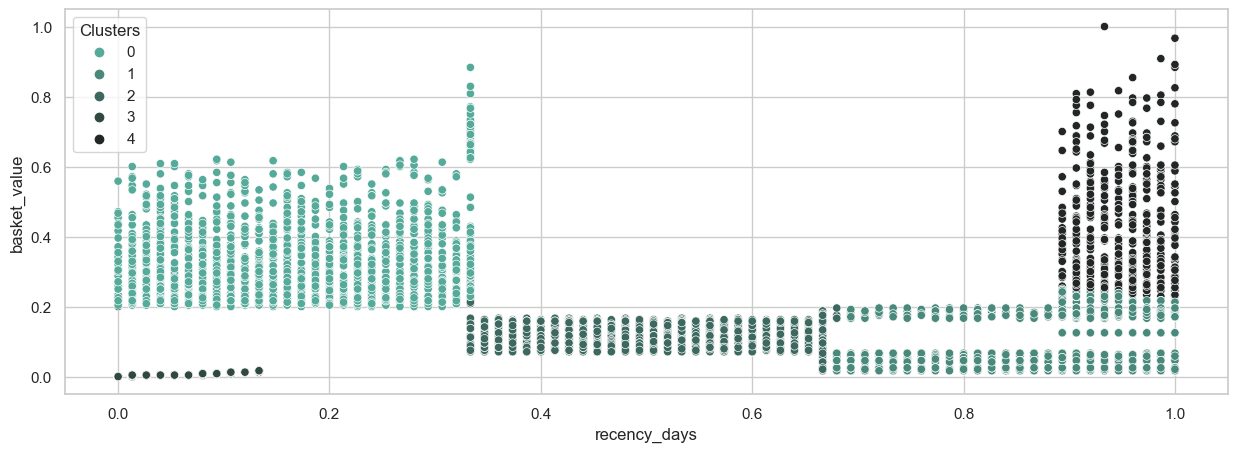

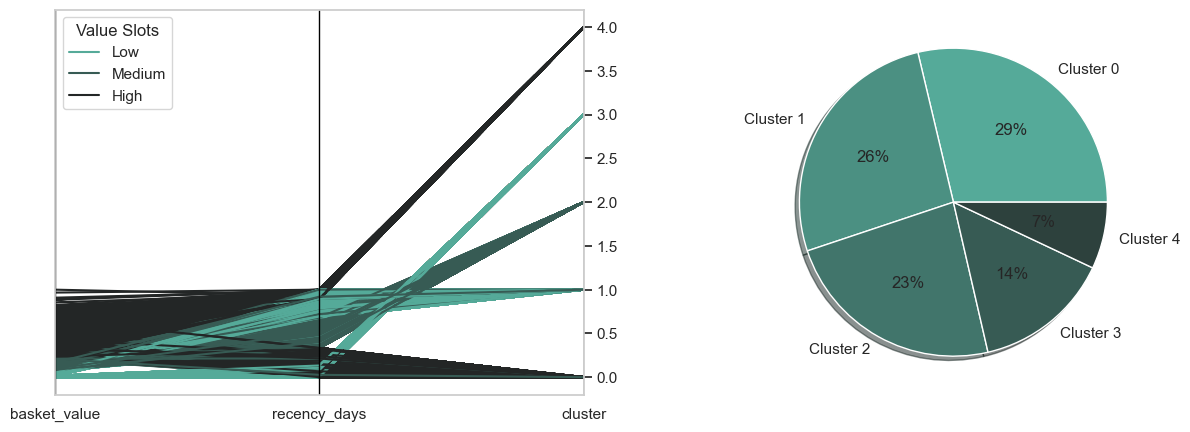

In [24]:
size = 0.3
fig = plt.figure(figsize=(15,5))


sns.scatterplot(data = df, x = "recency_days", y = "basket_value", hue = "cluster",palette="dark:#5A9_r")
plt.legend(title = "Clusters")

fig ,axes = plt.subplots(1,2,figsize=(15,5))

pd.plotting.parallel_coordinates(df, 'slot', ax = axes[0], color = ['#55aa99','#375b54', '#232626'])
axes[0].legend(title = "Value Slots")
axes[0].yaxis.tick_right()

axes[1].pie(df['cluster'].value_counts() ,labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], 
            autopct='%.0f%%', shadow=True)

plt.show()

### <u>Second Subquestion</u>

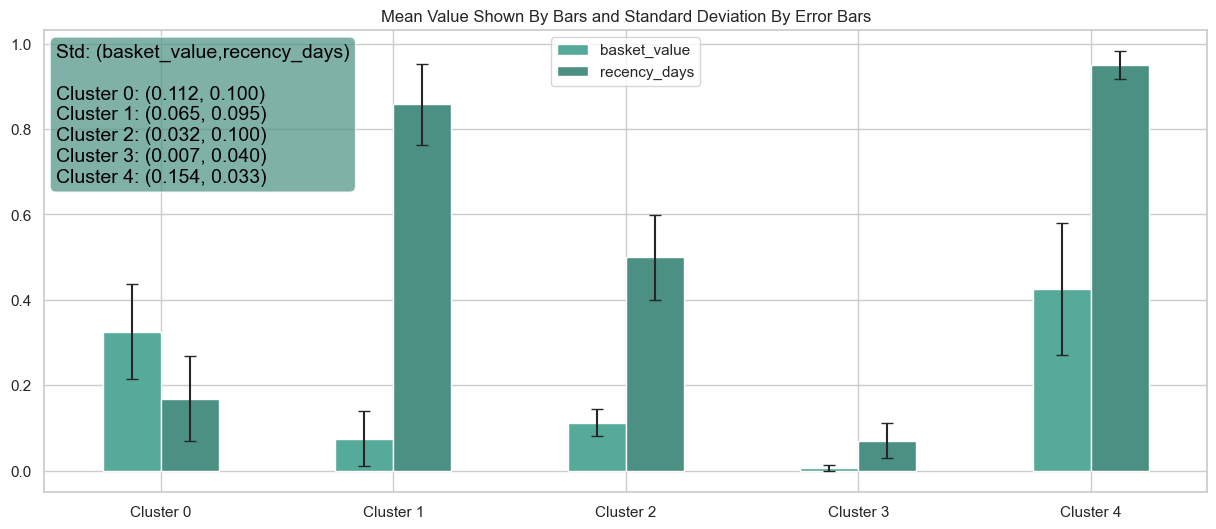

In [25]:
fig, ax = plt.subplots(figsize=(15,6))
    
grouped_df = df.groupby(["cluster"], as_index=False)
std = grouped_df.std()

grouped_df.mean(numeric_only = True).plot(x="cluster", y=["basket_value", "recency_days"], 
                       kind="bar", ax=ax, capsize=4, rot=0, yerr=std, xlabel= "")

cluster_labels = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']
cluster_values = range(len(cluster_labels))
cluster_map = dict(zip(cluster_labels, cluster_values))

ax.set_xticklabels(cluster_labels)
ax.set_xticks(cluster_values)
plt.title("Mean Value Shown By Bars and Standard Deviation By Error Bars")

text = f"Std: (basket_value,recency_days)\n\n\
Cluster 0: ({'%.3f'%(std.iloc[0,1])}, {'%.3f'%std.iloc[0,2]})\n\
Cluster 1: ({'%.3f'%(std.iloc[1,1])}, {'%.3f'%std.iloc[1,2]})\n\
Cluster 2: ({'%.3f'%(std.iloc[2,1])}, {'%.3f'%std.iloc[2,2]})\n\
Cluster 3: ({'%.3f'%(std.iloc[3,1])}, {'%.3f'%std.iloc[3,2]})\n\
Cluster 4: ({'%.3f'%(std.iloc[4,1])}, {'%.3f'%std.iloc[4,2]})"

ax.text(0.01,0.67 , text, transform=ax.transAxes, fontsize=14,
        bbox=dict(facecolor='#4b9082', alpha = 0.7, boxstyle='round'), 
        color ="black", backgroundcolor = "#41756b")
plt.legend(loc = "upper center")

plt.show()

### <u>Third Subquestion</u>

In [26]:
transactions["cluster"] = df["cluster"]

In [27]:
transactions = pd.get_dummies(transactions,prefix=["value_slot", "cluster"], columns = ["value_slot", "cluster"])
transactions.head()

,id,basket_value,recency_days,citrus fruit,tropical fruit,whole milk,other vegetables,rolls/buns,chocolate,bottled water,yogurt,sausage,root vegetables,pastry,soda,cream,value_slot_High,value_slot_Low,value_slot_Medium,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4
0,1,0.000000,0.013333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,0.104167,0.400000,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3,0.004167,0.080000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,0.229167,0.080000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,5,0.058333,0.866667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


### Combining K-Means and Association Rules:
 1. Find the top 20 rules based on itemset and clusters confidence.
 2. Find the top 20 rules based on itemset, basket value and clusters confidence.

### <u>First Subquestion</u>

In [28]:
# Run Apriori algorithm with min_support=0.02 and min_confidence=0.1 and print the results
items = apriori(transactions.drop(["id","recency_days", "basket_value", "value_slot_Low", "value_slot_Medium", "value_slot_High"], axis=1).astype(bool), min_support=.02, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.1)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

Total number of association rules : 360


##### <u>Cluster 0</u>

In [29]:
df_rules[df_rules["Right_Hand_Side"] == frozenset({'cluster_0'})].sort_values(by=['Confidence', 'Support'], ascending=False).head().T

,309,349,281,250,329
Left_Hand_Side,"(sausage, rolls/buns)","(sausage, soda)","(sausage, other vegetables)","(sausage, whole milk)","(sausage, yogurt)"
Right_Hand_Side,(cluster_0),(cluster_0),(cluster_0),(cluster_0),(cluster_0)
Support,0.036391,0.028366,0.031133,0.032932,0.020894
Confidence,0.873754,0.857741,0.849057,0.809524,0.782383
Lift,3.307816,3.247193,3.214317,3.064656,2.961909


##### <u>Cluster 1 | Cluster 2 | Cluster 3</u>

In [30]:
df_rules[df_rules["Right_Hand_Side"] == frozenset({'cluster_1'})].sort_values(by=['Confidence', 'Support'], ascending=False).head().T

,150,155,97,128,222
Left_Hand_Side,(pastry),(soda),(rolls/buns),(yogurt),"(whole milk, other vegetables)"
Right_Hand_Side,(cluster_1),(cluster_1),(cluster_1),(cluster_1),(cluster_1)
Support,0.05092,0.078317,0.06794,0.042203,0.021171
Confidence,0.420571,0.330029,0.271421,0.222303,0.20788
Lift,1.464805,1.149456,0.945329,0.774258,0.724025


In [31]:
df_rules[df_rules["Right_Hand_Side"] == frozenset({'cluster_2'})].sort_values(by=['Confidence', 'Support'], ascending=False).head().T

,104,235,145,157,114
Left_Hand_Side,(chocolate),"(whole milk, rolls/buns)",(root vegetables),(soda),(bottled water)
Right_Hand_Side,(cluster_2),(cluster_2),(cluster_2),(cluster_2),(cluster_2)
Support,0.022416,0.024353,0.042203,0.063927,0.039574
Confidence,0.331967,0.315978,0.284515,0.269388,0.263109
Lift,1.413746,1.345655,1.211661,1.147239,1.120502


In [32]:
df_rules[df_rules["Right_Hand_Side"] == frozenset({'cluster_3'})].sort_values(by=['Confidence', 'Support'], ascending=False).head().T

,116,57,80
Left_Hand_Side,(bottled water),(whole milk),(other vegetables)
Right_Hand_Side,(cluster_3),(cluster_3),(cluster_3)
Support,0.028504,0.061436,0.036806
Confidence,0.189512,0.176681,0.139779
Lift,1.318197,1.228947,0.972267


##### <u>Cluster 4</u>

In [33]:
df_rules[df_rules["Right_Hand_Side"] == frozenset({'cluster_4'})].sort_values(by=['Confidence', 'Support'], ascending=False).head().T

,339,318,293,355,260
Left_Hand_Side,"(yogurt, pastry)","(rolls/buns, pastry)","(other vegetables, pastry)","(soda, pastry)","(whole milk, pastry)"
Right_Hand_Side,(cluster_4),(cluster_4),(cluster_4),(cluster_4),(cluster_4)
Support,0.021171,0.02463,0.025737,0.021724,0.034316
Confidence,0.87931,0.864078,0.837838,0.758454,0.75841
Lift,12.534075,12.316941,11.942907,10.811337,10.810705


In [34]:
df_rules.iloc[:,0:-1].sort_values(by=['Confidence', 'Support'], ascending=False).head(20).T

,152,261,294,319,356,340,339,309,318,349,281,293,250,329,355,260,198,138,334,314
Left_Hand_Side,(cluster_4),"(whole milk, cluster_4)","(other vegetables, cluster_4)","(rolls/buns, cluster_4)","(soda, cluster_4)","(yogurt, cluster_4)","(yogurt, pastry)","(sausage, rolls/buns)","(rolls/buns, pastry)","(sausage, soda)","(sausage, other vegetables)","(other vegetables, pastry)","(sausage, whole milk)","(sausage, yogurt)","(soda, pastry)","(whole milk, pastry)","(root vegetables, tropical fruit)",(sausage),"(root vegetables, yogurt)","(rolls/buns, root vegetables)"
Right_Hand_Side,(pastry),(pastry),(pastry),(pastry),(pastry),(pastry),(cluster_4),(cluster_0),(cluster_4),(cluster_0),(cluster_0),(cluster_4),(cluster_0),(cluster_0),(cluster_4),(cluster_4),(cluster_0),(cluster_0),(cluster_0),(cluster_0)
Support,0.070154,0.034316,0.025737,0.02463,0.021724,0.021171,0.021171,0.036391,0.02463,0.028366,0.031133,0.025737,0.032932,0.020894,0.021724,0.034316,0.021447,0.094645,0.022969,0.021309
Confidence,1.0,1.0,1.0,1.0,1.0,1.0,0.87931,0.873754,0.864078,0.857741,0.849057,0.837838,0.809524,0.782383,0.758454,0.75841,0.748792,0.74026,0.653543,0.644351


### <u>Second Subquestion</u>

In [35]:
# Run Apriori algorithm with min_support=0.05 and min_confidence=0.4 and print the results
items = apriori(transactions.iloc[:,3:].astype(bool), min_support=.05, use_colnames=True)
as_rules = association_rules(items, metric="confidence", min_threshold=.4)

df_rules = pd.DataFrame(extract_rules(as_rules), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])
ids = np.append(df_rules.loc[df_rules["Left_Hand_Side"] == ()].index.values ,df_rules.loc[df_rules["Right_Hand_Side"] == ()].index.values)
df_rules.drop(ids, inplace=True)

print(f"Total number of association rules : {df_rules.shape[0]}")

Total number of association rules : 76


In [36]:
df_rules.iloc[:,0:-1].sort_values(by=['Confidence', 'Support'], ascending=False).head(20).T

,21,25,65,67,68,28,42,56,53,51,75,72,57,62,31,70,50,30,23,37
Left_Hand_Side,(cluster_4),(cluster_4),"(cluster_4, value_slot_High)","(pastry, cluster_4)",(cluster_4),(cluster_3),"(whole milk, cluster_3)","(rolls/buns, cluster_2)","(rolls/buns, value_slot_Low)","(rolls/buns, cluster_0)","(soda, cluster_2)","(value_slot_Low, soda)","(yogurt, cluster_0)","(root vegetables, cluster_0)","(tropical fruit, cluster_0)","(soda, cluster_0)","(other vegetables, cluster_2)",(cluster_2),(cluster_0),"(whole milk, cluster_0)"
Right_Hand_Side,(pastry),(value_slot_High),(pastry),(value_slot_High),"(pastry, value_slot_High)",(value_slot_Low),(value_slot_Low),(value_slot_Medium),(cluster_1),(value_slot_High),(value_slot_Medium),(cluster_1),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_High),(value_slot_Medium),(value_slot_Medium),(value_slot_High),(value_slot_High)
Support,0.070154,0.070154,0.070154,0.070154,0.070154,0.143628,0.061298,0.062543,0.051889,0.090632,0.061021,0.060329,0.075412,0.063373,0.062405,0.069185,0.057839,0.217933,0.24367,0.109036
Confidence,1.0,1.0,1.0,1.0,1.0,0.999038,0.997748,0.984749,0.984252,0.961821,0.954545,0.954048,0.952797,0.946281,0.945493,0.94518,0.93722,0.928108,0.922472,0.920561
